In [1]:
import jaxopt 
import jax.numpy as jnp
import numpy as np

We optimize $ f(x; a) = (x - \sin(a))^2 $ for $x$.
it should be $x_\ast=\sin(a) \equiv g(a)$

In [2]:
def f(x,a):
    return (x-jnp.sin(a))**2

In [3]:
gd = jaxopt.GradientDescent(fun=f, maxiter=500)

In [4]:
def g(a):
    res = gd.run(init_params=np.random.normal(0.0,1.0), a=a)
    params, state = res
    return params


In [5]:
g(0.1),np.sin(0.1)

(Array(0.09983342, dtype=float32), 0.09983341664682815)

In [34]:
def costf(x):
    return (x-jnp.sin(0.1))**2

from jaxopt import OptaxSolver
import optax
adam = OptaxSolver(opt=optax.adam(1.0e-2), fun=costf)

In [47]:
init_params = 0.1
params=init_params
state = adam.init_state(params)

0.1


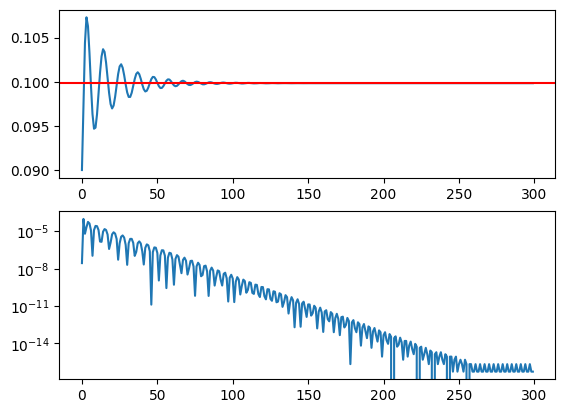

In [48]:
print(params)
val =[]
loss = []
for _ in range(300):  # Perform 10 steps
    params, state = adam.update(params, state)
    val.append(params)
    loss.append(state.value)
    #print(f"Step: {_+1}, Params: {params}, Loss: {state.value}")
val = np.array(val)
loss = np.array(loss)
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(211)
plt.plot(val)
plt.axhline(np.sin(0.1),color="red")
ax = fig.add_subplot(212)
plt.plot(loss)
plt.yscale("log")
plt.show()

In [6]:
from jax import grad

We compute $\frac{\partial}{\partial a} x_\mathrm{min} = \frac{\partial}{\partial a} g(a)$, should be $dg(a) = \cos(a)$.

In [7]:
dg=grad(g)

In [8]:

dg(-0.2),np.cos(-0.2)

(Array(0.9800666, dtype=float32, weak_type=True), 0.9800665778412416)

In [9]:
dx=[]
x=[]
alist=np.linspace(-0.2,0.2,21)
for ain in alist:
    x.append(g(ain))
    dx.append(dg(ain))

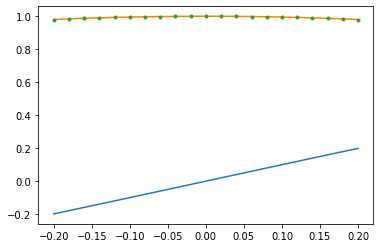

In [74]:
import matplotlib.pyplot as plt
plt.plot(alist,x)
plt.plot(alist,dx)
plt.plot(alist,np.cos(alist),".")